# Phase 1: Data Exploration & Analysis





In [1]:
# Loading the libraries 

import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

# Step 1: Loading Datasets



In [2]:
# Load the dataset 

customers_data = pd.read_json('../dataset/raw_data/customers_messy_data.json')
customers_data.head()


,customer_id,cust_id,customer_name,full_name,email,email_address,phone,phone_number,address,city,state,zip_code,postal_code,registration_date,reg_date,status,customer_status,total_orders,total_spent,loyalty_points,preferred_payment,age,birth_date,gender,segment
0,1,CUST_0001,Bob Wilson,alice.johnson@email.com,customer1@example.com,,None,(555) 368-2240,3861 First St,Los Angeles,PA,NaN,,2020-07-10,2022-04-08,active,suspended,10,3302.13,762,None,NaN,None,Other,None
1,2,CUST_0002,jane_doe,alice.johnson@email.com,customer2@example.com,user2@domain.com,None,,3798 First St,Los Angeles,California,17896.0,13801-4343,None,2023-02-01,None,ACTIVE,18,2387.55,891,cash,53.0,1976-08-07,M,premium
2,3,CUST_0003,alice.johnson@email.com,EVE WHITE,None,user3@domain.com,555-1848,(555) 423-7202,6800 Main St,new_york,NY,70271.0,,None,,suspended,inactive,45,1586.83,306,debit_card,67.0,1961-02-20,,None
3,4,CUST_0004,Bob Wilson,diana.prince,customer4@example.com,,555-1540,,8985 Second Ave,Phoenix,TX,77661.0,,2023-08-23,2021-01-01,pending,None,16,2221.77,298,cash,29.0,None,Other,new
4,5,CUST_0005,EVE WHITE,EVE WHITE,customer5@example.com,user5@domain.com,None,,4681 Pine Rd,chicago,IL,NaN,44658-7676,10/13/2023,2021-07-05,inactive,inactive,40,131.80,759,cash,NaN,1970-05-07,,regular


In [3]:
products_data =pd.read_json('../dataset/raw_data/products_inconsistent_data.json')
products_data.head()

,product_id,item_id,product_name,item_name,description,category,product_category,brand,manufacturer,price,list_price,cost,weight,dimensions,color,size,stock_quantity,stock_level,reorder_level,supplier_id,created_date,last_updated,is_active,rating
0,PROD_001,1,Product 1,Item 1 Name,Description for product 1,Books,Sports,Brand-A,BRAND-C,162.58,470.83,160.51,8.93,18x26x42,Green,M,260,405,11,None,2020-11-21,2023-12-07T18:30:00.000Z,no,NaN
1,PROD_002,2,Product 2,Item 2 Name,Description for product 2,Toys,CLOTHING,BRAND-C,,442.45,310.70,92.52,7.00,50x19x49,White,,496,118,36,None,2022-04-08,,0,2.6
2,PROD_003,3,Product 3,Item 3 Name,Description for product 3,Toys,CLOTHING,Brand D,brandE,276.95,82.21,230.31,2.11,43x34x22,Black,L,511,201,22,SUP_04,2021-04-08,2023-09-22T18:30:00.000Z,1,NaN
3,PROD_004,4,Product 4,Item 4 Name,Description for product 4,Books,CLOTHING,BrandA,brandE,102.61,114.56,232.00,5.75,7x17x37,White,S,444,128,34,SUP_07,None,2023-11-17T18:30:00.000Z,no,NaN
4,PROD_005,5,Product 5,Item 5 Name,Description for product 5,electronics,Books,brandE,BRAND-C,81.73,553.55,238.95,4.06,3x27x10,Blue,S,54,338,46,SUP_06,2022-11-13,2023-07-10T18:30:00.000Z,False,4.5


In [4]:
orders_data = pd.read_csv('../dataset/raw_data/orders_unstructured_data.csv')

orders_data.head()

,order_id,ord_id,customer_id,cust_id,order_date,order_datetime,product_id,item_id,quantity,qty,unit_price,price,total_amount,order_total,shipping_cost,tax,discount,status,order_status,payment_method,shipping_address,notes,tracking_number
0,ORD_00001,1,325,CUST_0325,2023-03-06,2023-12-06T05:09:00.000Z,PROD_187,126,9,5,46.25,304.96,954.20,462.79,14.50,33.51,0.00,returned,returned,credit_card,6771 Oak Ave,NaN,TRK752405
1,ORD_00002,2,204,CUST_0204,2023-02-11,2023-05-11T01:11:00.000Z,PROD_159,174,2,5,500.64,208.61,88.29,228.20,15.21,46.06,0.00,NaN,SHIPPED,cash,3778 Pine Rd,NaN,NaN
2,ORD_00003,3,220,CUST_0220,2023-03-02,2023-06-19T11:15:00.000Z,PROD_003,97,8,1,97.74,327.49,393.36,254.74,6.82,12.93,14.45,pending,pending,cash,4701 Main St,NaN,TRK597063
3,ORD_00004,4,383,CUST_0383,5/22/2023,2023-02-25T15:36:00.000Z,PROD_035,125,10,3,403.28,380.04,857.24,337.90,0.00,27.17,0.00,NaN,SHIPPED,credit_card,8807 Main St,Special delivery instructions,NaN
4,ORD_00005,5,171,CUST_0171,NaN,NaN,PROD_198,103,6,2,298.97,199.05,219.12,587.97,0.00,7.79,38.95,processing,pending,credit_card,6043 Oak Ave,NaN,NaN


# Summary of Nulls and Unique Values :
Evaluate null counts and number of unique entries for better understanding of state of data

In [5]:
# Basic Info of each dataset
print("Customers:")
print(customers_data.info(),"\n")

print("Products: ")
print(products_data.info(),"\n")

print("Orders")
print(orders_data.info(),)



Customers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        500 non-null    int64  
 1   cust_id            500 non-null    object 
 2   customer_name      500 non-null    object 
 3   full_name          500 non-null    object 
 4   email              401 non-null    object 
 5   email_address      500 non-null    object 
 6   phone              195 non-null    object 
 7   phone_number       500 non-null    object 
 8   address            500 non-null    object 
 9   city               500 non-null    object 
 10  state              500 non-null    object 
 11  zip_code           366 non-null    float64
 12  postal_code        500 non-null    object 
 13  registration_date  416 non-null    object 
 14  reg_date           500 non-null    object 
 15  status             435 non-null    object 
 16  customer_status

In [6]:
# Null Value  and unique values check 

print("Null summary (Customers):")
print(customers_data.isna().sum())

print("\nUnique columns (Customers):")
print(customers_data.nunique())

print("\nNull summary (Products):")
print(products_data.isna().sum())

print("\nUnique columns (Products):")
print(products_data.nunique())

print("\nNull summary (Orders):")
print(orders_data.isna().sum())

print("\nUnique columns (Orders):")
print(orders_data.nunique())


Null summary (Customers):
customer_id            0
cust_id                0
customer_name          0
full_name              0
email                 99
email_address          0
phone                305
phone_number           0
address                0
city                   0
state                  0
zip_code             134
postal_code            0
registration_date     84
reg_date               0
status                65
customer_status       58
total_orders           0
total_spent            0
loyalty_points         0
preferred_payment    107
age                  193
birth_date           312
gender                87
segment               99
dtype: int64

Unique columns (Customers):
customer_id          500
cust_id              500
customer_name         10
full_name             10
email                401
email_address        358
phone                194
phone_number         260
address              500
city                  10
state                  8
zip_code             366
postal_

## Inconsistent Categorical Values


In [7]:
print("Customer Status:\n", customers_data["status"].value_counts(dropna=False))
print("\nOrder Status:\n", orders_data["status"].value_counts(dropna=False))
print("\nProduct Active Flag:\n", products_data["is_active"].value_counts(dropna=False))


Customer Status:
 status
             81
INACTIVE     66
None         65
pending      63
inactive     62
ACTIVE       56
active       55
suspended    52
Name: count, dtype: int64

Order Status:
 status
CANCELLED     159
delivered     151
SHIPPED       146
returned      136
NaN           136
pending       136
processing    136
Name: count, dtype: int64

Product Active Flag:
 is_active
0        51
1        50
true     33
no       23
yes      23
false    20
Name: count, dtype: int64


# Exploratory Data Analysis (EDA)

### 1. Missing Value Heatmap
  

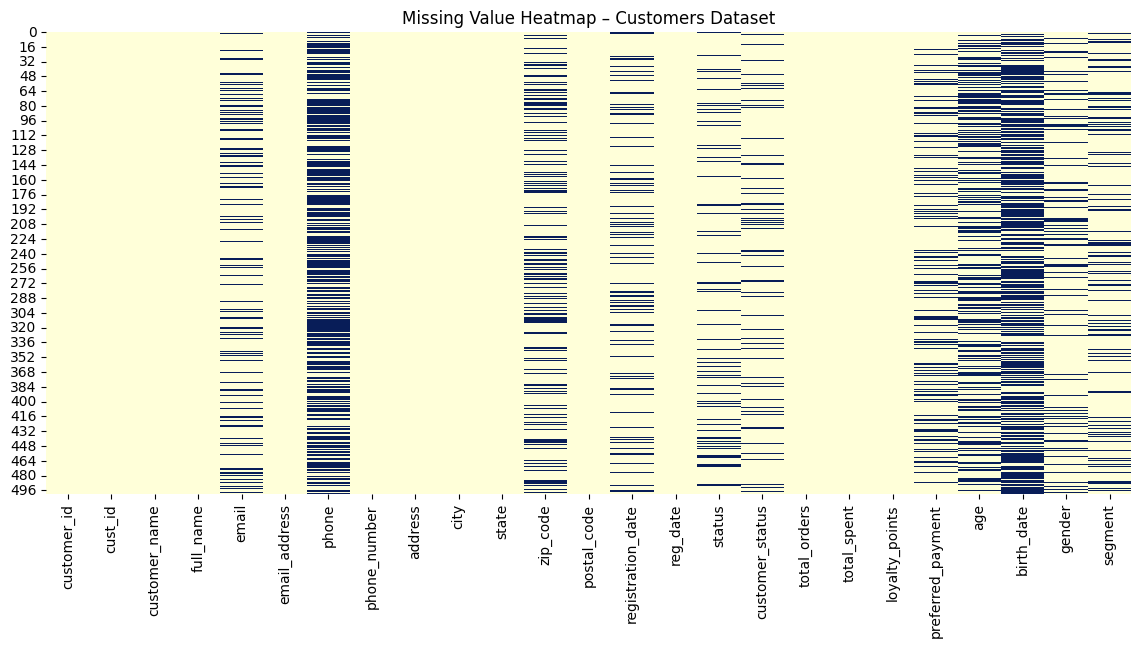

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.heatmap(customers_data.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Missing Value Heatmap – Customers Dataset")
plt.show()

Used a heatmap to visualize which columns in the customer dataset have frequent missing values. This quickly highlighted fields like `phone`, `birth_date`, and `email_address` as high-priority targets for cleaning.

### 2. Summary Statistics

We examine numeric and categorical statistics to understand value ranges, data spread, and frequency of categories.


In [9]:
# Summary stats
display(customers_data.describe())
display(customers_data.describe(include='object'))


,customer_id,zip_code,total_orders,total_spent,loyalty_points,age
count,500.000000,366.000000,500.00000,500.000000,500.000000,307.000000
mean,250.500000,55191.330601,24.75400,2562.317460,496.724000,49.622150
std,144.481833,25993.871508,14.93357,1442.891163,285.937974,16.962682
min,1.000000,10156.000000,0.00000,10.560000,4.000000,18.000000
25%,125.750000,33728.000000,12.00000,1298.440000,260.500000,36.000000
50%,250.500000,58417.500000,25.00000,2575.890000,483.000000,51.000000
75%,375.250000,76888.000000,38.25000,3798.362500,745.500000,65.000000
max,500.000000,99818.000000,49.00000,4999.840000,997.000000,77.000000


,cust_id,customer_name,full_name,email,email_address,phone,phone_number,address,city,state,postal_code,registration_date,reg_date,status,customer_status,preferred_payment,birth_date,gender,segment
count,500,500,500,401,500,195,500,500,500,500,500,416,500,435,442,393,188,413,401
unique,500,10,10,401,358,194,260,500,10,8,294,385,306,7,7,4,188,6,4
top,CUST_0001,alice.johnson@email.com,alice.johnson@email.com,customer1@example.com,,555-5737,,3861 First St,Los Angeles,IL,,2023-02-25,,,,cash,1976-08-07,F,vip
freq,1,55,63,1,143,2,241,1,65,73,207,3,152,81,77,110,1,74,112


### 3. Top Cities and States

This helps spot data entry inconsistencies like "la" vs. "Los Angeles", and identify where the majority of customers are located.


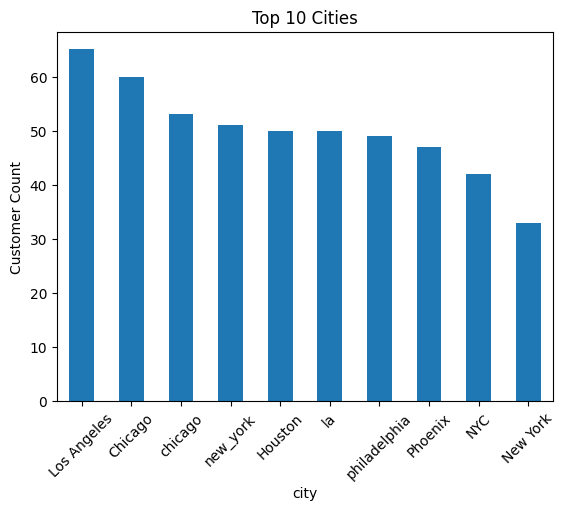

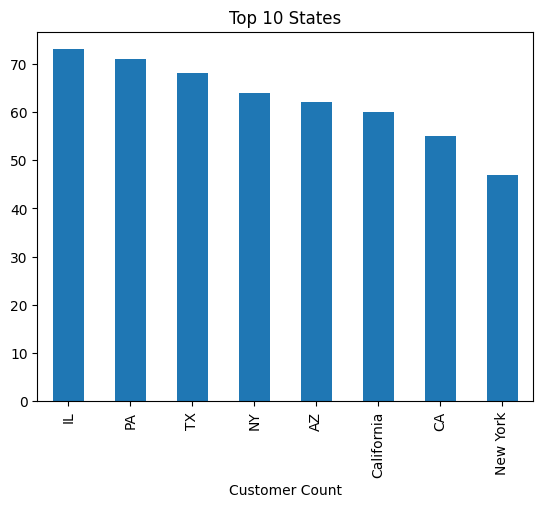

In [10]:
# Top cities
customers_data['city'].value_counts().head(10).plot(kind='bar', title='Top 10 Cities')
plt.ylabel("Customer Count")
plt.xticks(rotation=45)
plt.show()

# Top states
customers_data['state'].value_counts().head(10).plot(kind='bar', title='Top 10 States')
plt.xlabel("Customer Count")
plt.show()


### 4. Customer Segments and Status Overview
These visualizations show how customers are distributed across segments and statuses, which is useful for business analysis.


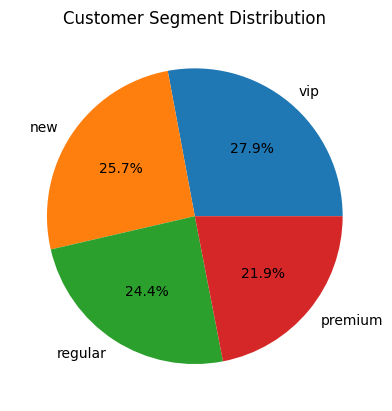

In [11]:
# Segment
customers_data['segment'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Customer Segment Distribution')
plt.ylabel('')
plt.show()


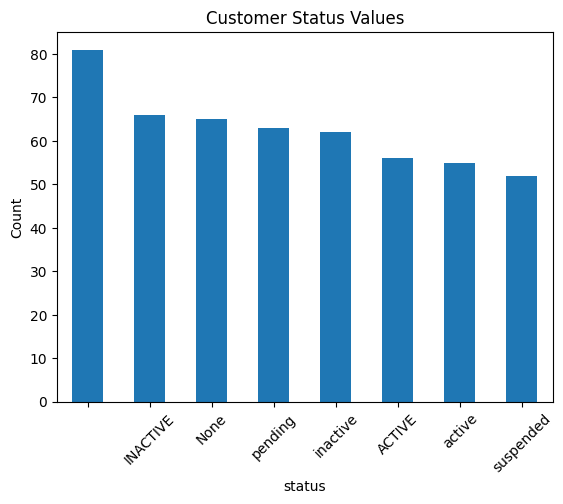

In [12]:
# Status
customers_data['status'].value_counts(dropna=False).plot(kind='bar', title='Customer Status Values')
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()


### 5. Correlation Matrix

Identifies relationships between numeric fields such as orders, spending, and loyalty points.


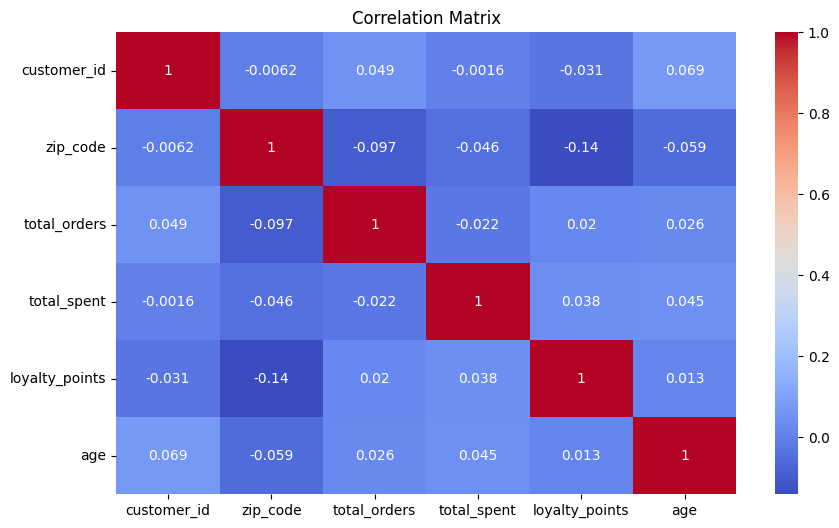

In [13]:
# Correlation
plt.figure(figsize=(10,6))
sns.heatmap(customers_data.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## EDA Summary

From EDA, I found that:
- Multiple status and gender formats that need normalization
- Common missing fields: `birth_date`, `registration_date`, `state`
- City and state name inconsistencies (`la` vs `Los Angeles`)
- Several duplicated emails or names across customers
- Spending and loyalty points show strong positive correlation




## Data Quality Issues that I found after analyzing datasets

### Customers
- Duplicate fields: `customer_name`, `full_name`, `email`, `email_address`
- Mixed gender values: `M`, `F`, `Female`, `Other`, `''`
- Mixed date formats: `registration_date`, `reg_date`
- Inconsistent `status`: `ACTIVE`, `active`, `Inactive`, etc.
- Nulls in: `phone`, `age`, `birth_date`, `preferred_payment`, etc.

### Orders
- Duplicate fields: `order_id` vs `ord_id`, `qty` vs `quantity`
- Mixed formats in `order_date`
- Inconsistent `status`, missing `order_datetime`
- Nulls in `tracking_number`, `notes`

### Products
- Duplicate fields: `product_id` vs `item_id`, `product_name` vs `item_name`
- Inconsistent boolean in `is_active` field: `yes`, `no`, `0`, `False`, etc.
- Mixed casing in brand/category
- Nulls in: `description`, `supplier_id`, `created_date`


# Identifying hidden relationships between tables

In [14]:


# Show Common Columns
print(" Customers columns:", customers_data.columns.tolist())
print(" Products columns:", products_data.columns.tolist())
print(" Orders columns:", orders_data.columns.tolist())



 Customers columns: ['customer_id', 'cust_id', 'customer_name', 'full_name', 'email', 'email_address', 'phone', 'phone_number', 'address', 'city', 'state', 'zip_code', 'postal_code', 'registration_date', 'reg_date', 'status', 'customer_status', 'total_orders', 'total_spent', 'loyalty_points', 'preferred_payment', 'age', 'birth_date', 'gender', 'segment']
 Products columns: ['product_id', 'item_id', 'product_name', 'item_name', 'description', 'category', 'product_category', 'brand', 'manufacturer', 'price', 'list_price', 'cost', 'weight', 'dimensions', 'color', 'size', 'stock_quantity', 'stock_level', 'reorder_level', 'supplier_id', 'created_date', 'last_updated', 'is_active', 'rating']
 Orders columns: ['order_id', 'ord_id', 'customer_id', 'cust_id', 'order_date', 'order_datetime', 'product_id', 'item_id', 'quantity', 'qty', 'unit_price', 'price', 'total_amount', 'order_total', 'shipping_cost', 'tax', 'discount', 'status', 'order_status', 'payment_method', 'shipping_address', 'notes', 

In [15]:
# Customers ↔ Orders
cust_id_match = orders_data['customer_id'].isin(customers_data['customer_id']).value_counts()
alt_cust_id_match = orders_data['cust_id'].isin(customers_data['cust_id']).value_counts()

# Orders ↔ Products
product_id_match = orders_data['product_id'].isin(products_data['product_id']).value_counts()

print("orders.customer_id matches customers.customer_id:\n", cust_id_match)
print("\norders.cust_id matches customers.cust_id:\n", alt_cust_id_match)
print("\norders.product_id matches products.product_id:\n", product_id_match)


orders.customer_id matches customers.customer_id:
 customer_id
True    1000
Name: count, dtype: int64

orders.cust_id matches customers.cust_id:
 cust_id
True    1000
Name: count, dtype: int64

orders.product_id matches products.product_id:
 product_id
True    1000
Name: count, dtype: int64


##  Data Cleaning Strategy

To ensure high-quality, joinable data across the three platforms, I’ve designed a cleaning strategy that handles field duplication, inconsistent formats, and null values.



###  Customers
-Merged Columns: Unified fields like `customer_name` + `full_name`, `email` + `email_address`, `phone` + `phone_number`.
- Standardized Formats: Converted `registration_date` to datetime; normalized `status` and `gender` to lowercase/enums.
- Cleaned Identifiers: Kept `customer_id` as the primary key, dropped redundant `cust_id`.
- Handled Missing Values: Filled missing `preferred_payment`, `zip_code` using mode; dropped records with no valid email or phone.
- Removed Duplicates: Based on name, email, and ID overlap.

---

###  Orders
- Consolidated Fields: Dropped duplicates like `ord_id`, `cust_id`, `qty`, keeping standardized columns only.
- Unified Timestamps: Merged `order_date` and `order_datetime` into a clean `order_timestamp` column.
- Normalized Status: Merged `status` + `order_status`, cleaned inconsistent labels (`SHIPPED`, `shipped`, `Returned`).
- Checked Metrics: Verified or recalculated `total_amount` = `quantity * price` where needed.
- Filled Nulls: Replaced missing `tracking_number` with `'NOT_AVAILABLE'`; handled missing date rows with care.

---

###  Products
- Resolved Field Duplication: Kept `product_id` and `product_name`, dropped `item_id` and `item_name`.
- Standardized Categorical Fields: Cleaned and lowercased `brand`, `category`, `is_active`.
- Cleaned Numeric Data: Ensured valid prices, dropped or capped outliers, and imputed missing `weight`/`rating` by median.
- Date Cleanup: Parsed `created_date`, `last_updated`; dropped invalid or future-dated records.

---

###  Validation
- Ensured all `Orders.customer_id` exist in `Customers`, and all `Orders.product_id` in `Products`.
- Enforced data type consistency and set up clean joins for ETL in Phase 2.
